In [ ]:
#模型下载
from modelscope import snapshot_download
model_dir = snapshot_download('AI-ModelScope/stable-diffusion-xl-base-1.0', cache_dir="/data1/zhengnanyan/huggingface/modelscope")

In [1]:
from diffusers import DiffusionPipeline
import torch
from PIL import Image

pipe = DiffusionPipeline.from_pretrained("huggingface/modelscope/AI-ModelScope/stable-diffusion-xl-base-1___0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

/data1/zhengnanyan/miniconda3/envs/VLM310/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "huggingface/modelscope/AI-ModelScope/stable-diffusion-xl-base-1___0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

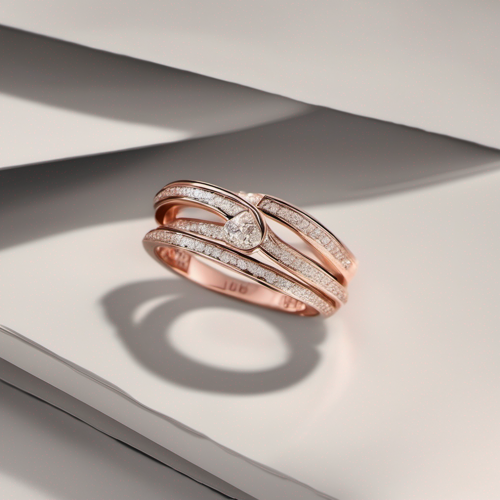

In [4]:
prompt = "Design a ring with the styles of Chanel and Cartier at the same time, noble but simple, rose gold"

images = pipe(prompt=prompt).images[0]
new_size = (500,500)
images.resize(new_size)

In [6]:
images = pipe(prompt=prompt).images

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
def make_grid(images, rows, cols):
    w, h = images[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, image in enumerate(images):
        grid.paste(image, box=(i % cols * w, i // cols * h))
    return grid

In [9]:
image_grid = make_grid(images, rows=2, cols=3)

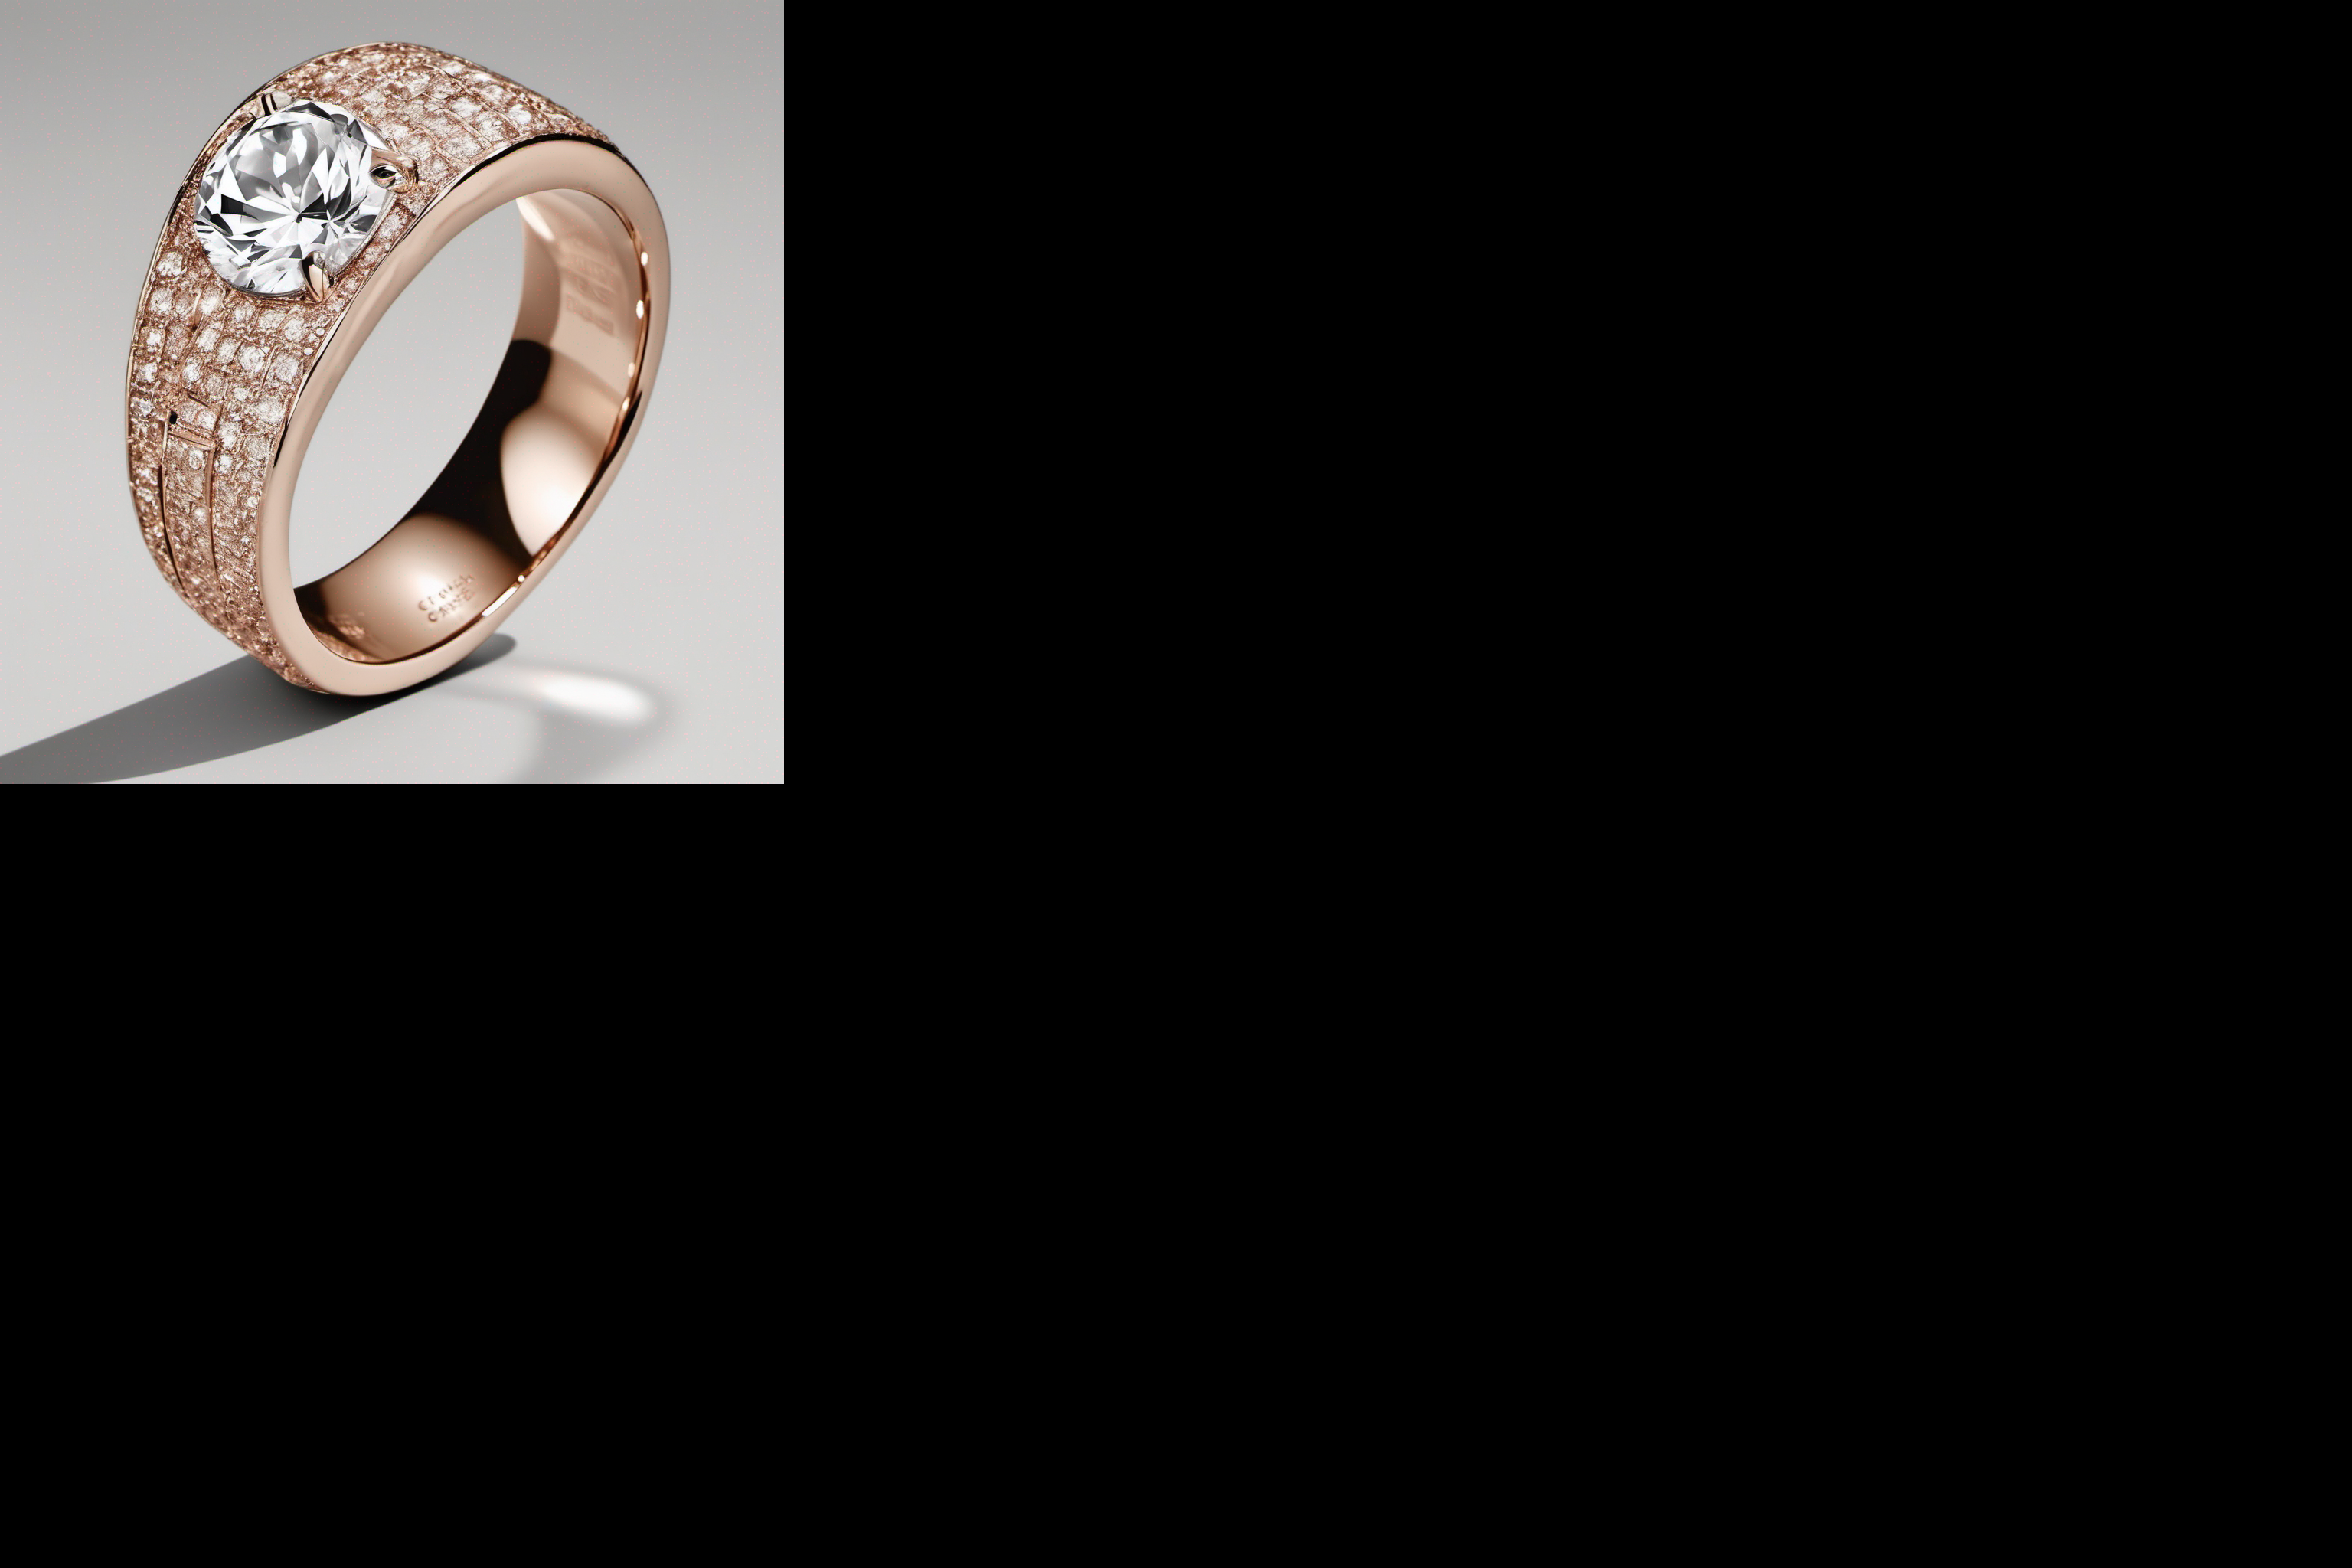

In [10]:
image_grid